In [122]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.lda import LDA
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
import math
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline

In [2]:
stock = pd.read_excel("Stock_Data_Perf.xlsx")

In [3]:
avrg = stock.iloc[:, 1::8]

In [4]:
perc = pd.DataFrame([x for x in range(len(avrg)-1)])

In [5]:
for x in range(0, len(perc)-1):    
    perc = perc.join(avrg.iloc[:, x:x+1].pct_change(), how="inner")


In [6]:
del perc[0]

In [7]:
pct_change = perc

In [8]:
pct_change.fillna(value=0, inplace=True)

In [9]:
pct_change.head()

Avrg_MMM  Avrg_ABT  Avrg_ABBV  Avrg_ACN  Avrg_ATVI  Avrg_AYI  Avrg_ADBE  \
0  0.000000  0.000000   0.000000  0.000000   0.000000  0.000000   0.000000   
1 -0.014469 -0.002747  -0.012602 -0.017170  -0.008606 -0.019809  -0.006697   
2 -0.013130 -0.007288  -0.005420 -0.008478  -0.015822 -0.018667  -0.012943   
3  0.000526  0.002130  -0.051352  0.216648  -0.018302  0.010167   0.270513   
4  0.014978  0.015967   0.105428 -0.154528  -0.001487  0.025968  -0.201226   

   Avrg_AAP  Avrg_AES  Avrg_AET    ...     Avrg_XEL  Avrg_XRX  Avrg_XLNX  \
0  0.000000  0.000000  0.000000    ...     0.000000  0.000000   0.000000   
1 -0.015363 -0.017857 -0.013259    ...    -0.002328 -0.021696  -0.008900   
2 -0.008828 -0.022356  0.000282    ...     0.002769 -0.015154  -0.015643   
3  0.017692 -0.115218  0.279313    ...     0.054155 -0.220814   0.114056   
4  0.021904  0.133761 -0.187620    ...    -0.036960  0.316865  -0.094348   

    Avrg_XL  Avrg_XYL  Avrg_YHOO  Avrg_YUM  Avrg_ZBH  Avrg_ZION  Avrg_ZTS  
0  0.000000  0.000000   0.000000  0.000000       0.0   0.000000  0.000000  
1 -0.000871 -0.043141  -0.016815 -0.015173       0.0  -0.025278 -0.003745  
2  0.010684 -0.026531  -0.004858 -0.016488       0.0  -0.037570 -0.008387  
3  0.038580  0.145424  -0.217830  0.015364       0.0   0.101106  0.105633  
4 -0.021775 -0.117136   0.287400  0.023125       0.0  -0.088800 -0.062015  

[5 rows x 503 columns]

In [10]:
corr = pct_change.corr()

In [11]:
corr.head()

Avrg_MMM  Avrg_ABT  Avrg_ABBV  Avrg_ACN  Avrg_ATVI  Avrg_AYI  \
Avrg_MMM   1.000000  0.437284   0.208254  0.189038   0.236210  0.370529   
Avrg_ABT   0.437284  1.000000   0.392263  0.159294   0.267160  0.351291   
Avrg_ABBV  0.208254  0.392263   1.000000 -0.275109  -0.126807  0.033149   
Avrg_ACN   0.189038  0.159294  -0.275109  1.000000   0.246532  0.251756   
Avrg_ATVI  0.236210  0.267160  -0.126807  0.246532   1.000000  0.445938   

           Avrg_ADBE  Avrg_AAP  Avrg_AES  Avrg_AET    ...     Avrg_XEL  \
Avrg_MMM    0.141699  0.305690  0.305993  0.108235    ...     0.180049   
Avrg_ABT    0.173972  0.333119  0.261088  0.161198    ...     0.123491   
Avrg_ABBV  -0.276401  0.296196  0.483440 -0.133275    ...    -0.381264   
Avrg_ACN    0.920508  0.081262 -0.512995  0.860700    ...     0.388160   
Avrg_ATVI   0.297679  0.062880 -0.127662  0.081908    ...     0.487425   

           Avrg_XRX  Avrg_XLNX   Avrg_XL  Avrg_XYL  Avrg_YHOO  Avrg_YUM  \
Avrg_MMM   0.178099   0.223434  0.350603  0.235734   0.196207  0.330346   
Avrg_ABT   0.130262   0.226348  0.371378  0.164221   0.217989  0.315955   
Avrg_ABBV  0.310486  -0.109016  0.258609 -0.239137   0.500390  0.161767   
Avrg_ACN  -0.654793   0.730768  0.267067  0.827711  -0.624903  0.136985   
Avrg_ATVI  0.066553   0.320222  0.100597  0.335887   0.127891  0.216231   

           Avrg_ZBH  Avrg_ZION  Avrg_ZTS  
Avrg_MMM   0.255558   0.267195  0.193068  
Avrg_ABT   0.443931   0.230322  0.303349  
Avrg_ABBV  0.302018   0.028904  0.221910  
Avrg_ACN   0.149683   0.691461  0.594785  
Avrg_ATVI  0.259779   0.033089  0.167839  

[5 rows x 503 columns]

In [12]:
data = corr.values

In [13]:
pca = PCA(n_components=len(corr)-1)

In [14]:
data_r = pca.fit(data).transform(data)

In [15]:
labels = [x for x in pct_change.head(0)]

/Users/ashort/anaconda2/envs/econ/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



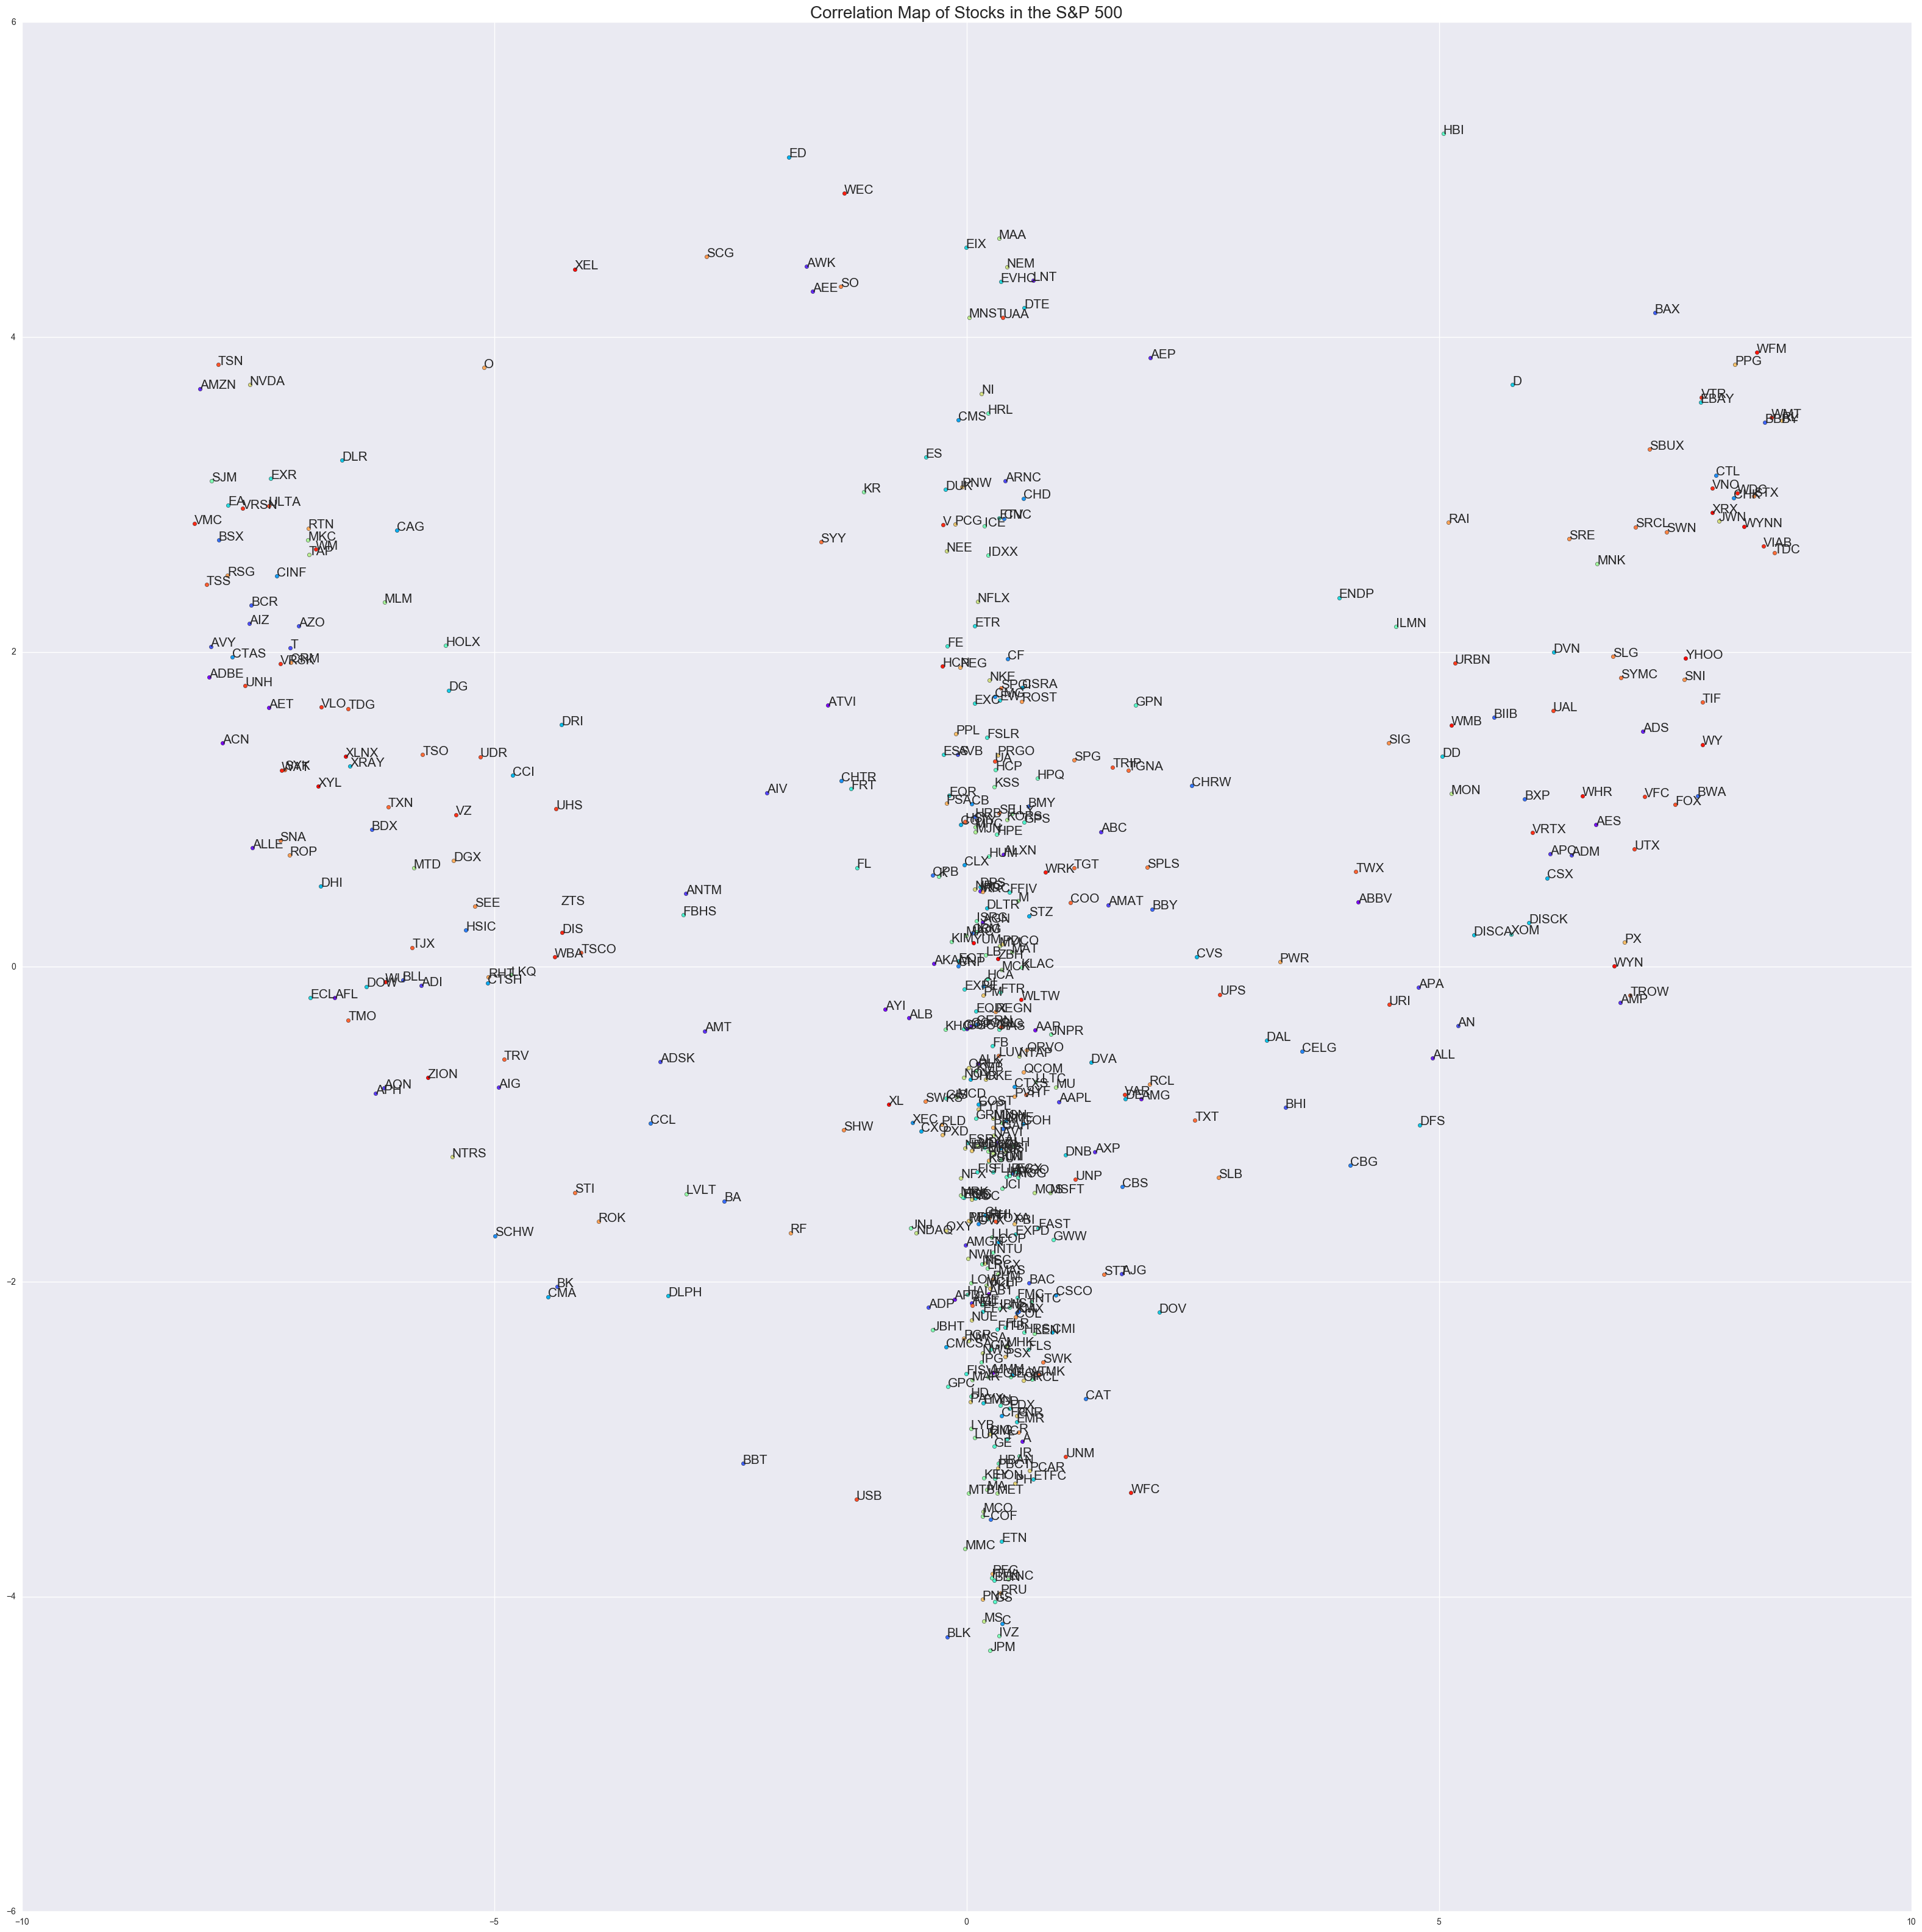

In [16]:
fig = plt.figure(figsize=(40, 40))
ax = fig.add_subplot(111)
colors = cm.rainbow(np.linspace(0, 1, len(labels)-1))
for c, i, target_name in zip(colors, [i for i in range(0, len(labels)-1)], labels):
    plt.scatter(data_r[i, 0], data_r[i, 1], c=c, alpha = 1)
    plt.legend()

for i, txt in enumerate(labels):
    plt.annotate(txt[5:], (data_r[i, 0], data_r[i, 1]), fontsize=15)
    
plt.title("Correlation Map of Stocks in the S&P 500", fontsize=20)

plt.show()

In [17]:
np.corrcoef(np.array(stock['Avrg_GOOG']), np.array(stock['Avrg_YHOO']))

array([[ 1.        , -0.24014185],
       [-0.24014185,  1.        ]])

In [18]:
a = np.array([x for x in range(0, 10, 2)])
b = np.array([ y for y in range(0, 10, 2)])

0.00210681880334


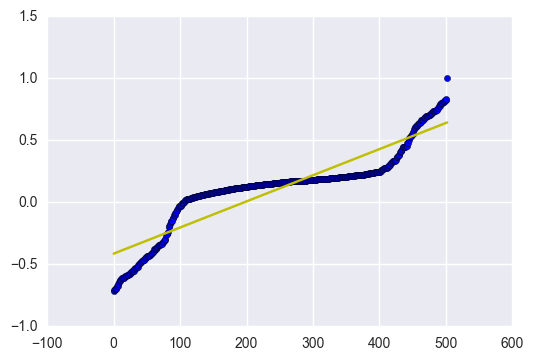

In [19]:
x = [x for x in range(0, len(corr['Avrg_YHOO']))]
y = sorted([i for i in corr['Avrg_YHOO']])

plt.scatter(np.array(x), np.array(y))
m, b = np.polyfit(x, y, 1)

x_ = [m*c + b for c in x]

plt.plot(np.array(x), np.array(x_), '-', c='y')
print m

In [21]:
corr['Avrg_GOOG'].head()

Avrg_MMM     0.326467
Avrg_ABT     0.376447
Avrg_ABBV    0.185860
Avrg_ACN     0.168877
Avrg_ATVI    0.281720
Name: Avrg_GOOG, dtype: float64

In [45]:
py.sign_in('am.short7', 'E0X28xzbcbrchyKwIOpa')

In [73]:
def comp_corr_graph(comp):
    a = pd.DataFrame(corr['{}'.format(comp)])

    x_coord = []
    y_coord = []

    for l in a.values:
        l_ = 1 - float(math.fabs(l))
        if l_ != 0:
            x = np.random.randint(-l_*10000, l_*10000)/float(10000)
            y = (l_*l_ - x*x)**(1/2.0)
        
            x_coord.append(x)
            y_coord.append(y)
        
        else:
            x_coord.append(float(0))
            y_coord.append(float(0))
        
    a['x_values'], a['y_values'] = x_coord, y_coord

    def circle(r, color):
        return plt.Circle((0, 0), r, color='{}'.format(color), fill=False, lw=7, alpha=0.4)

    plt.figure(figsize=(40, 40))
    scatter = plt.scatter(a['x_values'], a['y_values'])

    circle1 = circle(0.1, 'r')
    circle2 = circle(0.2, 'g')
    circle3 = circle(0.3, 'b')
    circle4 = circle(0.4, 'r')
    circle5 = circle(0.6, 'g')
    circle6 = circle(0.8, 'y')
    circle7 = circle(1, 'r')

#     ax.legend(loc="upper right")

    fig = plt.gcf()
    ax = fig.gca()

    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(circle3)
    ax.add_artist(circle4)
    ax.add_artist(circle5)
    ax.add_artist(circle6)
    ax.add_artist(circle7)
    ax.add_artist(scatter)
    
    ax.set(title="Correlation map for the Company at (0,0)")
    
    comp_names = [c for c in avrg.head(0)]

    for i, txt in enumerate(comp_names):
        ax.annotate(txt[5:], (x_coord[i], y_coord[i]), fontsize=15)
        
    data = [
        go.Contour(
            z = [i for i in a['{}'.format(comp)].values],
            x = [z for z in a['x_values'].values],
            y = [w for w in a['y_values'].values],
            contours=dict(
                start=0, 
                end=1,
                size=0.1
            )
    )]

    return py.iplot(data)

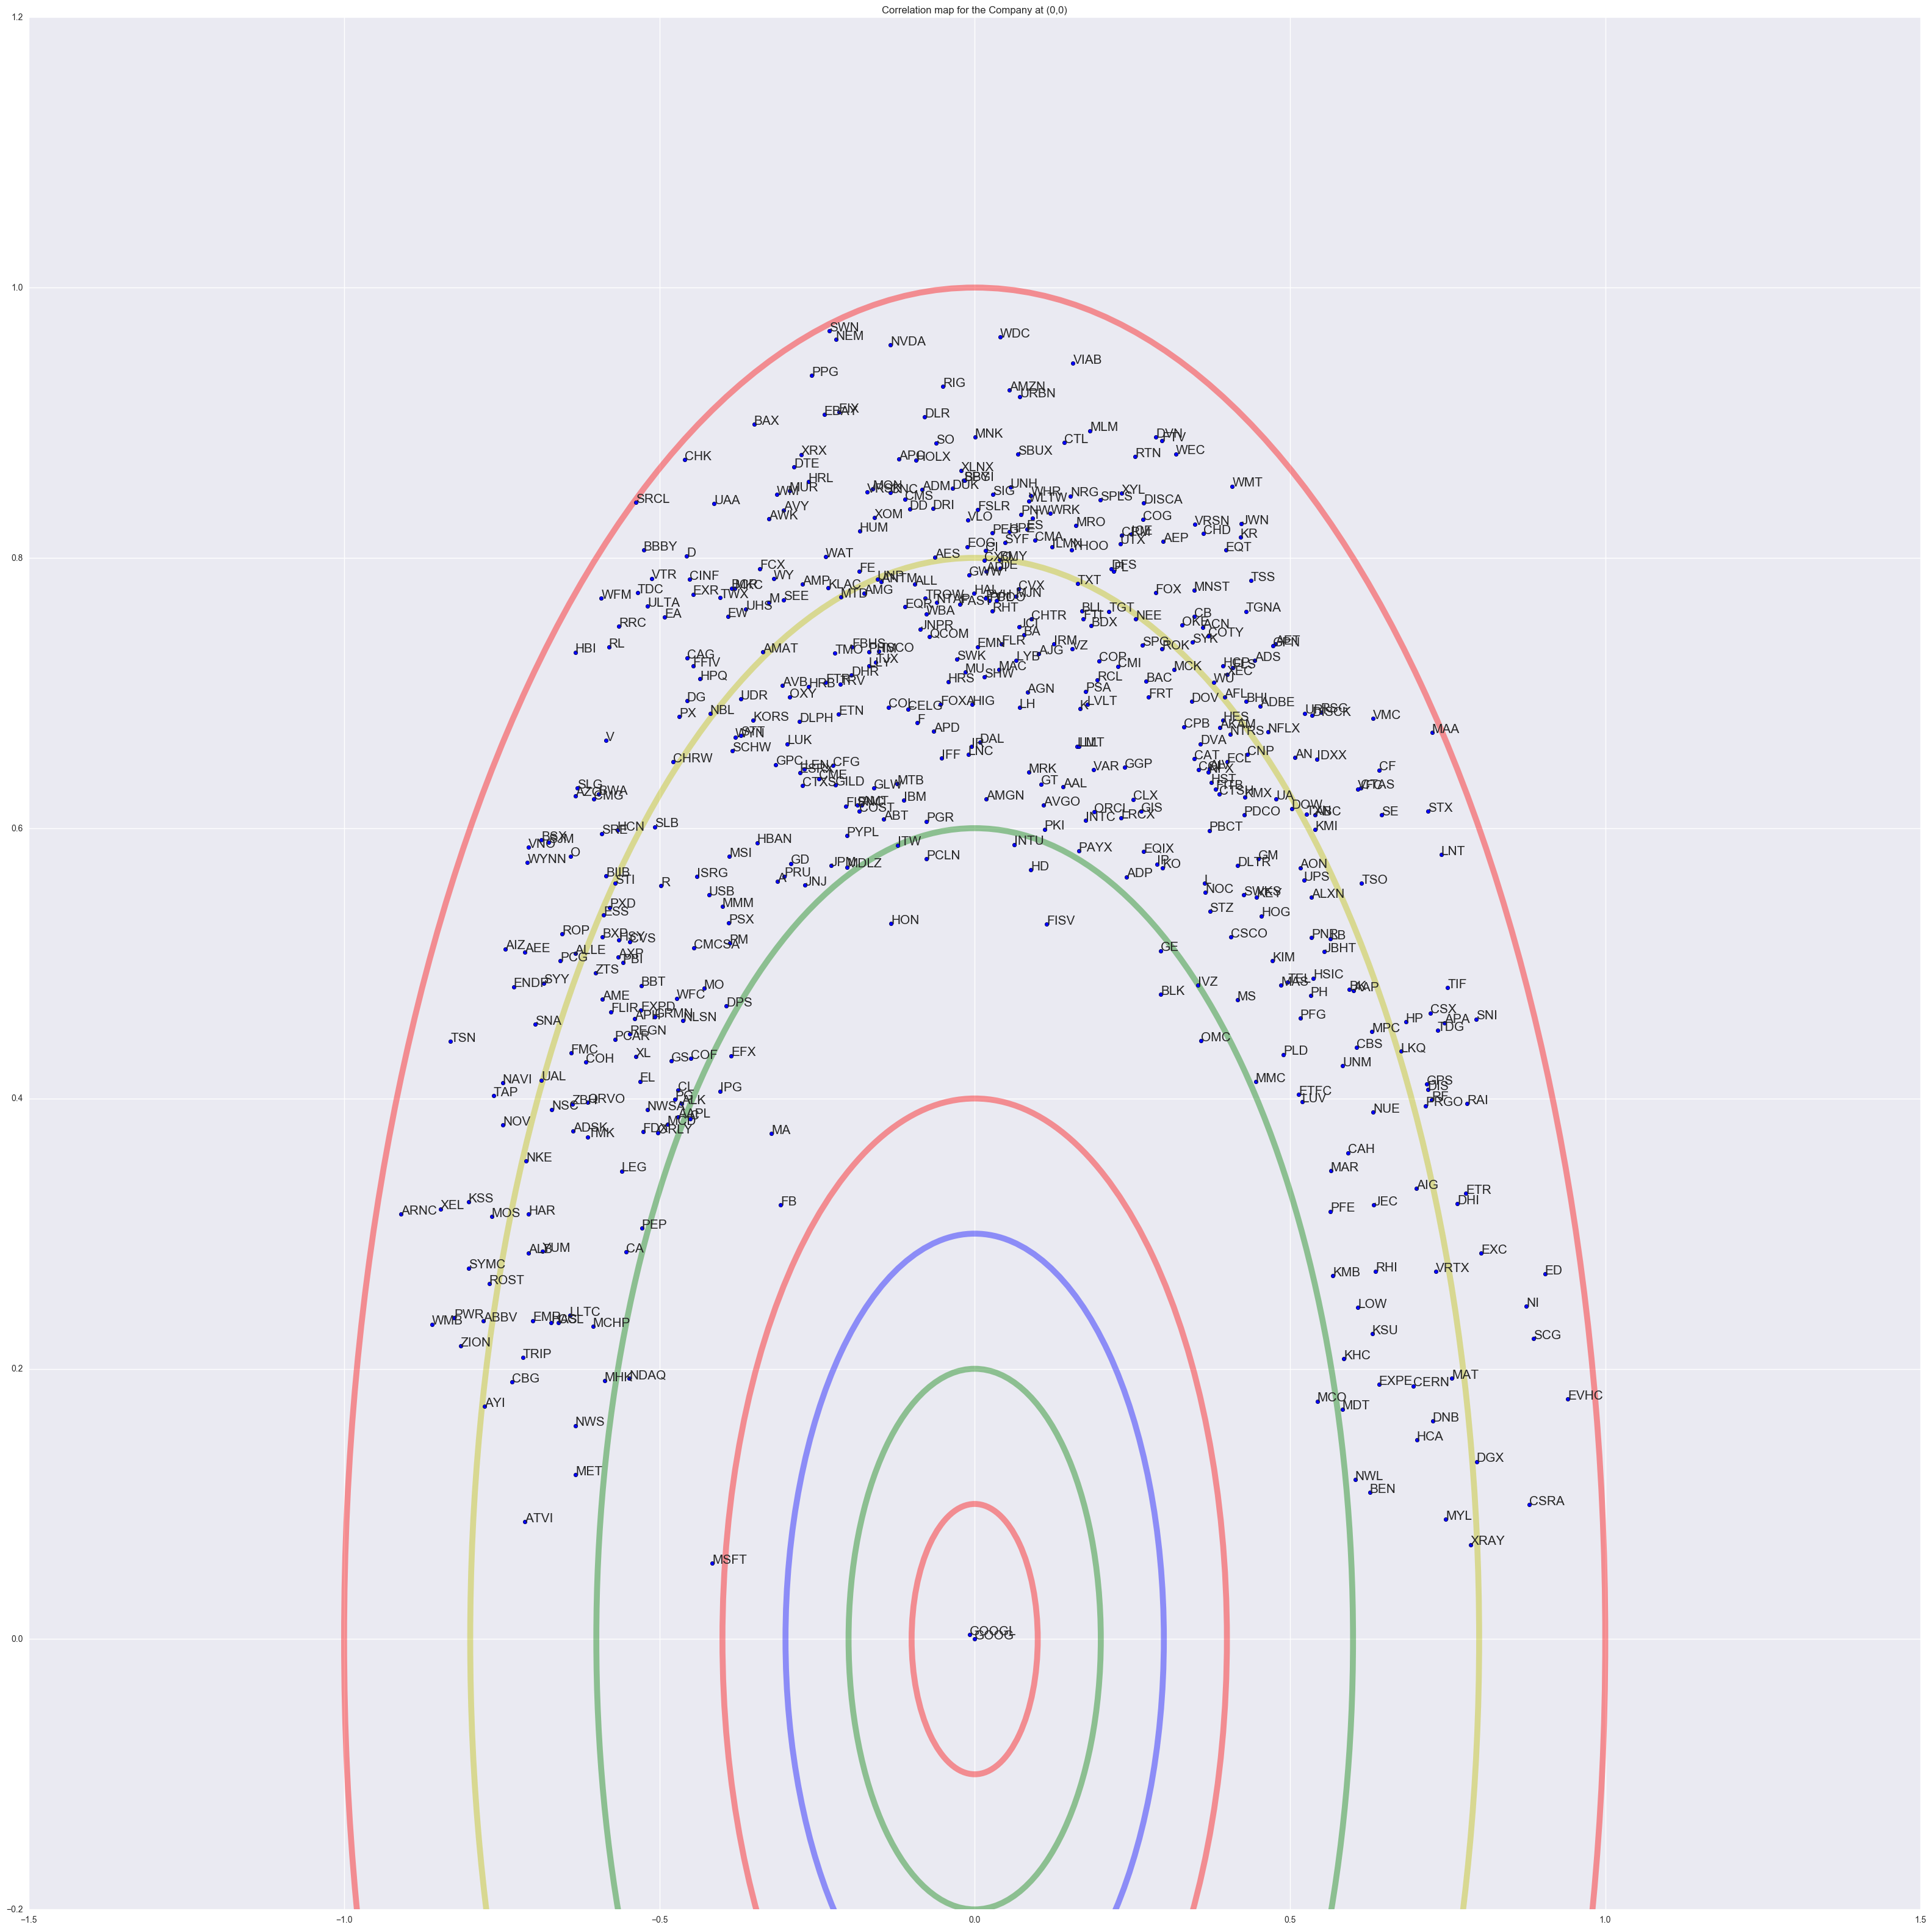

In [74]:
comp_corr_graph('Avrg_GOOG')

In [75]:
demo = avrg.iloc[:, 1:100:10]

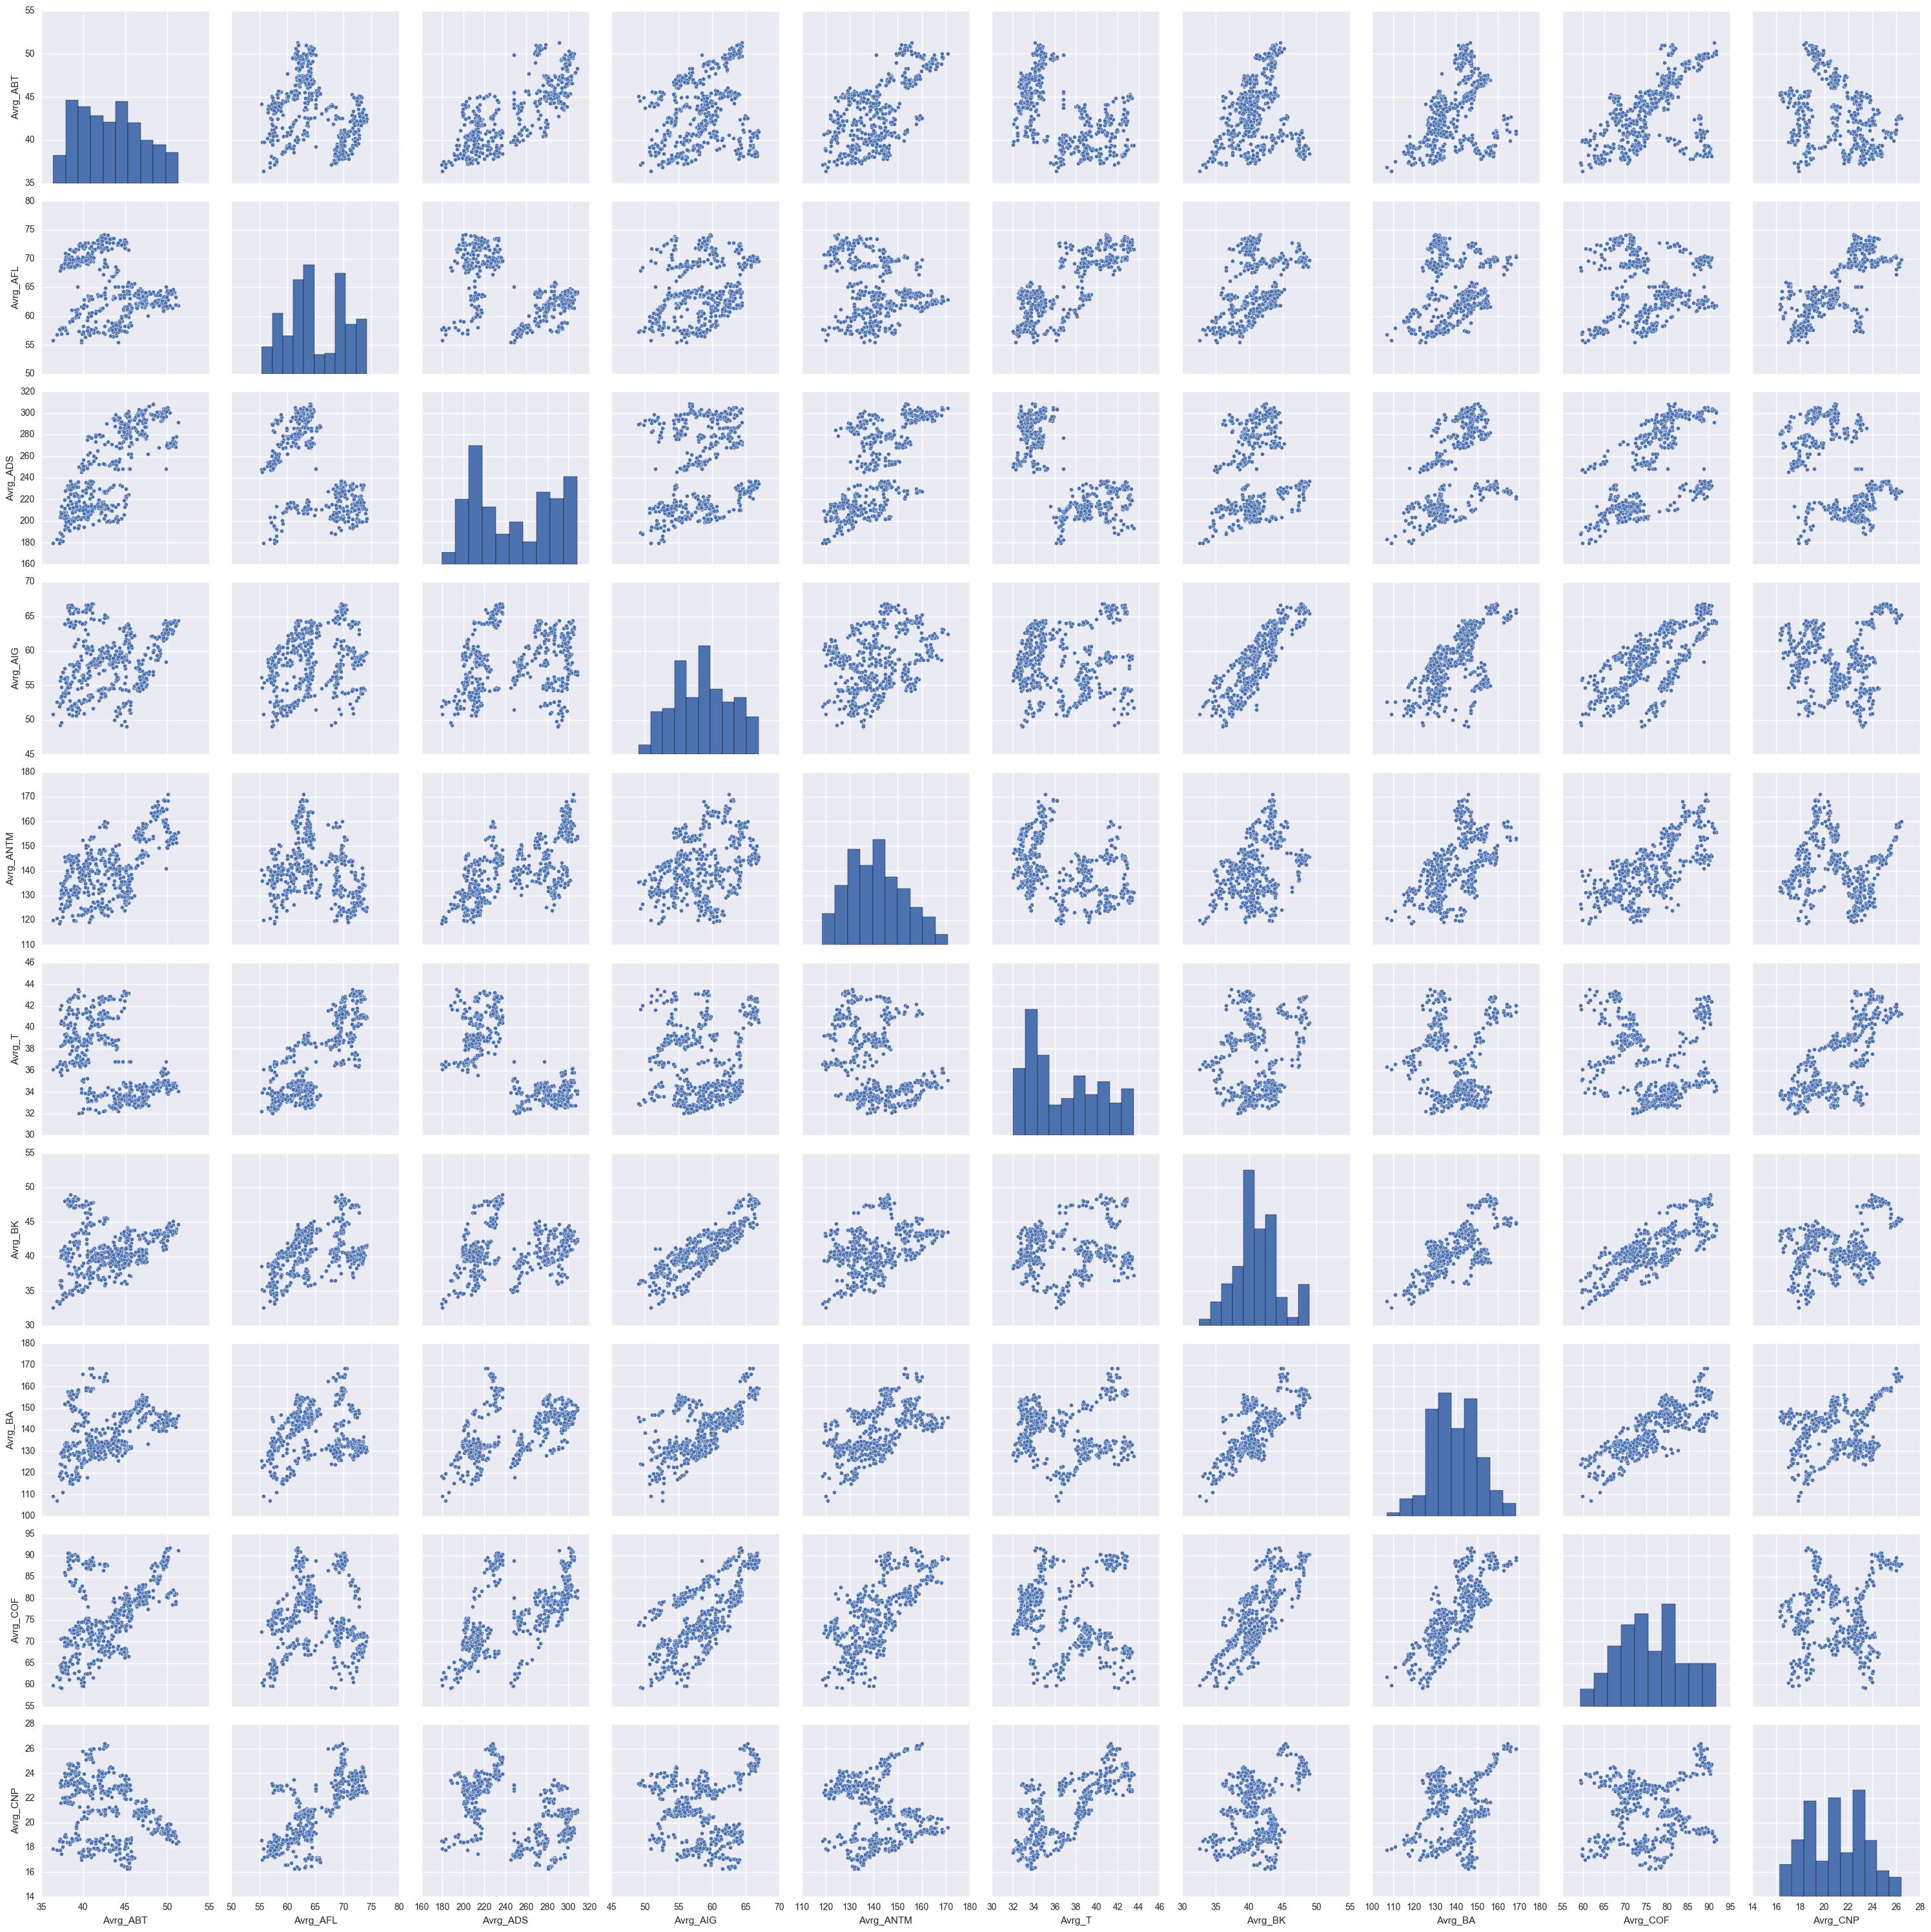

In [76]:
sns.pairplot(demo, size=3)

In [77]:
def comps_most_correlated(comp):
    corr_comps = corr.sort_values(by=['{}'.format(comp)], ascending=False).T
    threshold_comps = [str(a) for a in corr_comps.head(0) if a != '{}'.format(comp)]
    return pd.DataFrame(avrg, columns=[threshold_comps[:7]])

In [145]:
parameters = {"max_depth":[3, 7, 13, 20, 30],
             "max_features":[None, "auto"],
             "min_samples_leaf":[2, 3, 5, 7, 9],
             "min_samples_split":[2, 5, 10],
             "criterion":['mse']}
ridge_alphas = np.logspace(0, 8, 200)

In [153]:
def regression_type(comp, model, parameters, ridge_alphas):
    corr_comps = corr.sort_values(by=['{}'.format(comp)], ascending=False).T
    companies = [str(a) for a in corr_comps.head(0) if a != '{}'.format(comp)]
    correlated_comps = comps_most_correlated('{}'.format(comp))
    
    lr = LinearRegression()
    dec_tree = DecisionTreeRegressor()
    

    y = avrg['{}'.format(comp)].values
    x = comps_most_correlated('{}'.format(comp)).values
    
    ss = StandardScaler()
    Xn = ss.fit_transform(x)
    
    xtrain, xtest, ytrain, ytest = train_test_split(Xn, y, test_size=0.3, random_state=10)
    
    if model == "OLS":
        lr.fit(X=xtrain, y=ytrain)
        ytrain_pred, ytest_pred = lr.predict(xtrain), lr.predict(xtest)
        
        print "Using OLS I got the following results:\n"
        
        print "The coefficients are:"
        for i in range(len(lr.coef_)):
            print "{}:".format(companies[i])
            print "\t{}".format(lr.coef_[i])
    
        print "The R squared score of the tested data is: {0:.2f}".format(r2_score(ytest, ytest_pred))
        print "The score for the trained data is: {0:.2f}".format(r2_score(ytrain, ytrain_pred))    
    
        print "The MSE value in the tested data is: {0:.2f}".format(mean_squared_error(ytest, ytest_pred))
        print "The value for trained data is: {0:.2f}".format(mean_squared_error(ytrain, ytrain_pred))
        
    elif model == "decision tree":
        dec_tree_gs = GridSearchCV(dec_tree, parameters, n_jobs=-1, verbose=1)
        dec_tree_gs.fit(xtrain, ytrain)
       
        best_model = dec_tree_gs.best_estimator_
        ytrain_pred = best_model.predict(xtrain)
        ytest_pred = best_model.predict(xtest)
        
        print "Using Decision Tree analysis I got the following results and statistics:\n"
    
        feature_importance = pd.DataFrame({'feature':correlated_comps.columns, 'importance':best_model.feature_importances_})
        print feature_importance
        print "The R squared score of the tested data is: {0:.2f}".format(r2_score(ytest, ytest_pred))
        print "The score for the trained data is: {0:.2f}".format(r2_score(ytrain, ytrain_pred))    
    
        print "The MSE value in the tested data is: {0:.2f}".format(mean_squared_error(ytest, ytest_pred))
        print "The value for trained data is: {0:.2f}".format(mean_squared_error(ytrain, ytrain_pred))
            
    elif model == "Ridge":
        optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
        optimal_ridge.fit(xtrain, ytrain)
        ridge = Ridge(alpha=optimal_ridge.alpha_)
        ridge.fit(xtrain, ytrain)
        ytrain_pred = ridge.predict(xtrain)
        ytest_pred = ridge.predict(xtest)
        
        print "Using the Ridge model, I got the following results and statistics:\n"
        
        print "The coefficients are:"
        for i in range(len(ridge.coef_)):
            print "{}:".format(companies[i])
            print "\t{}".format(ridge.coef_[i])
        
        print "The R squared score of the tested data is: {0:.2f}".format(r2_score(ytest, ytest_pred))
        print "The score for the trained data is: {0:.2f}".format(r2_score(ytrain, ytrain_pred))    
    
        print "The MSE value in the tested data is: {0:.2f}".format(mean_squared_error(ytest, ytest_pred))
        print "The value for trained data is: {0:.2f}".format(mean_squared_error(ytrain, ytrain_pred))
        
    elif model == "Lasso":
        optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
        optimal_lasso.fit(xtrain, ytrain)
        lasso = Lasso(alpha=optimal_lasso.alpha_)
        lasso.fit(xtrain, ytrain)
        ytrain_pred = lasso.predict(xtrain)
        ytest_pred = lasso.predict(xtest)
        
        print "Using the Lasso model, I got the following results and statistics:\n"
        
        print "The coefficients are:"
        for i in range(len(lasso.coef_)):
            print "{}:".format(companies[i])
            print "\t{}".format(lasso.coef_[i])
    
        print "The R squared score of the tested data is: {0:.2f}".format(r2_score(ytest, ytest_pred))
        print "The score for the trained data is: {0:.2f}".format(r2_score(ytrain, ytrain_pred))    
    
        print "The MSE value in the tested data is: {0:.2f}".format(mean_squared_error(ytest, ytest_pred))
        print "The value for trained data is: {0:.2f}".format(mean_squared_error(ytrain, ytrain_pred))
    
    else:
        print "The models need to be inputted as: OLS, decision tree, Lasso or Ridge."

In [154]:
comps_most_correlated("Avrg_FB").head()

Avrg_MA  Avrg_GOOGL  Avrg_GOOG  Avrg_PYPL    Avrg_HD  Avrg_FISV   Avrg_CL
0  86.161075  531.457500  527.29750   37.63758  104.22870    71.1150  69.04250
1  84.239975  523.087475  518.63000   37.63758  101.90250    70.1075  68.83660
2  83.082475  513.475000  508.54625   37.63758  101.35750    69.9100  68.26000
3  83.917500  507.810000  503.74850   37.63758  103.29125    70.4300  68.16375
4  85.342500  502.735000  498.78750   37.63758  106.02500    71.9600  69.05500

In [155]:
regression_type("Avrg_FB", "OLS", parameters, ridge_alphas)

Using OLS I got the following results:

The coefficients are:
Avrg_MA:
	0.324454847716
Avrg_GOOGL:
	12.2160288261
Avrg_GOOG:
	-0.874460133945
Avrg_PYPL:
	1.64184407496
Avrg_HD:
	-3.24793793262
Avrg_FISV:
	7.59086697404
Avrg_CL:
	2.54194319367
The R squared score of the tested data is: 0.96
The score for the trained data is: 0.96
The MSE value in the tested data is: 12.64
The value for trained data is: 11.87


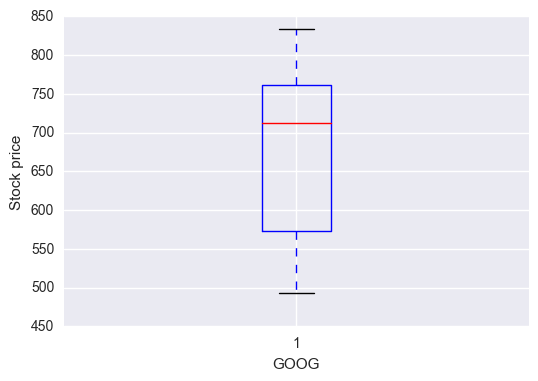

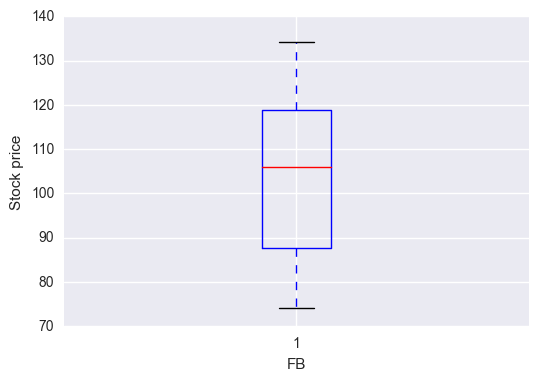

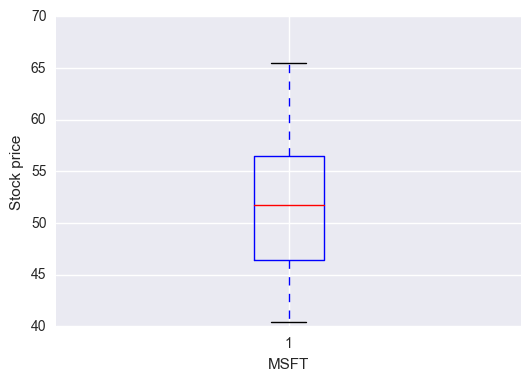

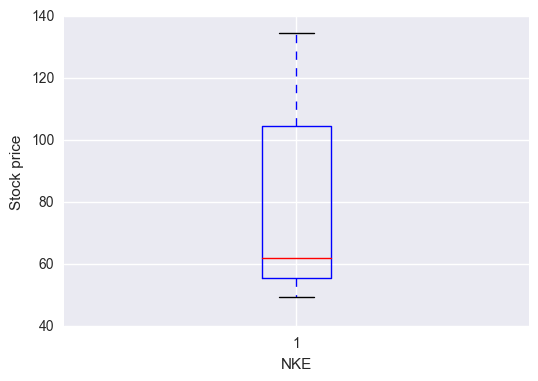

In [161]:
boxplots_ = ["Avrg_GOOG", "Avrg_FB", "Avrg_MSFT", "Avrg_NKE"]
for compan in boxplots_:
    plt.boxplot(avrg[compan])
    plt.xlabel("{}".format(compan[5:]))
    plt.ylabel("Stock price")
    plt.show()

In [172]:
def comps_corr_2(comp):
    corr_comps = corr.sort_values(by=['{}'.format(comp)], ascending=False).T
    threshold_comps = [str(a) for a in corr_comps.head(0) if a != '{}'.format(comp)]
    return pd.DataFrame(avrg, columns=[threshold_comps])
    

In [272]:
def limiting_xvalues(comp, data):
    revised_companies = data.keys()
    
    x_df = pd.DataFrame()
    for l in revised_companies:
        x_df = pd.concat([x_df, avrg[l]], axis=1)
    
    lr = LinearRegression()

    y = avrg[comp].values
    # x = comps_most_correlated('Avrg_FB').values
    x = x_df.values

    ss = StandardScaler()
    Xn = ss.fit_transform(x)
    
    xtrain, xtest, ytrain, ytest = train_test_split(Xn, y, test_size=0.3, random_state=10)

    lr.fit(X=xtrain, y=ytrain)
    ytrain_pred, ytest_pred = lr.predict(xtrain), lr.predict(xtest)

# Combining companies and their coefficients    
    
    explan_comps = {}
    for k in range(len(lr.coef_)):
        if math.fabs(lr.coef_[k]) > 2:
            explan_comps[x_df.head(0)[k]] = lr.coef_[k]
        else:
            pass
        
    print "Using OLS I got the following results:\n"
        
    print "The coefficients are:"
    for i in range(len(lr.coef_)):
        print "{}:".format(x_df[i])
        print "\t{}".format(lr.coef_[i])
    
    print "The R squared score of the tested data is: {0:.2f}".format(r2_score(ytest, ytest_pred))
    print "The score for the trained data is: {0:.2f}".format(r2_score(ytrain, ytrain_pred))    
    print "The MSE value in the tested data is: {0:.2f}".format(mean_squared_error(ytest, ytest_pred))
    print "The value for trained data is: {0:.2f}".format(mean_squared_error(ytrain, ytrain_pred))
    
    return x_df

In [243]:
def initial_data_for_update(comp):
    initialized_data= {}
    for u in range(len([p for p in comps_corr_2(comp).head(0)])-1):
        initialized_data[[p for p in comps_corr_2(comp).head(0)][u]] = 10
    return initialized_data

In [246]:
update = limiting_xvalues("Avrg_FB", initial_data_for_update("Avrg_FB"))
for t in range(4): 
    update = limit_xvalues("Avrg_FB", update)

Using OLS I got the following results:

The coefficients are:
Avrg_MA:
	0.963296307674
Avrg_GOOGL:
	-0.552632562691
Avrg_GOOG:
	-0.295543532635
Avrg_PYPL:
	0.369310907816
Avrg_HD:
	-0.927309315697
Avrg_FISV:
	0.686959823918
Avrg_CL:
	-0.345712444137
Avrg_MCO:
	0.462211672469
Avrg_PEP:
	-0.122230408134
Avrg_AAPL:
	-0.623692832585
Avrg_HON:
	1.22644085131
Avrg_MSFT:
	0.766190607782
Avrg_INTU:
	-0.813133193103
Avrg_MHK:
	-0.985599825066
Avrg_EFX:
	0.985634299123
Avrg_EQIX:
	-0.302813974453
Avrg_JNJ:
	-0.391208625654
Avrg_MDT:
	0.251318617641
Avrg_AVGO:
	-0.897315661738
Avrg_PCLN:
	0.0254534775384
Avrg_GE:
	-0.723377058931
Avrg_JPM:
	-2.00164122971
Avrg_OMC:
	0.133197404568
Avrg_PAYX:
	0.0682734809047
Avrg_LRCX:
	0.267637446291
Avrg_GD:
	1.48946391791
Avrg_DPS:
	1.85870654428
Avrg_ADP:
	1.65157043888
Avrg_C:
	1.47845883076
Avrg_MCD:
	0.866935069525
Avrg_LEG:
	-0.253090776212
Avrg_IPG:
	2.31178734155
Avrg_BLK:
	-1.23630827079
Avrg_STZ:
	-0.755739907726
Avrg_LLL:
	-0.122123518221
Avrg_ITW:
	

{'Avrg_ABT': 2.204120119138306,
 'Avrg_BEN': 3.6455682605297581,
 'Avrg_CB': -2.2594383033952585,
 'Avrg_ESS': 2.5810365283171852,
 'Avrg_EVHC': 2.1400801623964893,
 'Avrg_HOLX': -2.4268502473545386,
 'Avrg_HPE': 2.1013387772347736,
 'Avrg_HUM': 2.1196781657533785,
 'Avrg_IPG': 2.3117873415496963,
 'Avrg_JEC': -2.14864363458081,
 'Avrg_JPM': -2.0016412297064781,
 'Avrg_KIM': -2.0687580243955734,
 'Avrg_MMC': 2.4384547170803543,
 'Avrg_MOS': 3.2272317225944089,
 'Avrg_NSC': 2.3321370541284008,
 'Avrg_NWSA': -2.0435669619391561,
 'Avrg_ORLY': 2.1209382985885932,
 'Avrg_PKI': -2.2397638251532266,
 'Avrg_PNR': 2.1511654362607611,
 'Avrg_RHI': -2.9363497631377635,
 'Avrg_UDR': -2.5260684813950025,
 'Avrg_UNH': 2.4817882056587122,
 'Avrg_VZ': 2.4904734868437708,
 'Avrg_WFC': -2.1486648682016045,
 'Avrg_WFM': -2.423053840443175,
 'Avrg_WYN': -2.0624237337934832}

In [250]:
update = limiting_xvalues("Avrg_FB", initial_data_for_update("Avrg_FB"))

Using OLS I got the following results:

The coefficients are:
Avrg_MA:
	0.963296307674
Avrg_GOOGL:
	-0.552632562691
Avrg_GOOG:
	-0.295543532635
Avrg_PYPL:
	0.369310907816
Avrg_HD:
	-0.927309315697
Avrg_FISV:
	0.686959823918
Avrg_CL:
	-0.345712444137
Avrg_MCO:
	0.462211672469
Avrg_PEP:
	-0.122230408134
Avrg_AAPL:
	-0.623692832585
Avrg_HON:
	1.22644085131
Avrg_MSFT:
	0.766190607782
Avrg_INTU:
	-0.813133193103
Avrg_MHK:
	-0.985599825066
Avrg_EFX:
	0.985634299123
Avrg_EQIX:
	-0.302813974453
Avrg_JNJ:
	-0.391208625654
Avrg_MDT:
	0.251318617641
Avrg_AVGO:
	-0.897315661738
Avrg_PCLN:
	0.0254534775384
Avrg_GE:
	-0.723377058931
Avrg_JPM:
	-2.00164122971
Avrg_OMC:
	0.133197404568
Avrg_PAYX:
	0.0682734809047
Avrg_LRCX:
	0.267637446291
Avrg_GD:
	1.48946391791
Avrg_DPS:
	1.85870654428
Avrg_ADP:
	1.65157043888
Avrg_C:
	1.47845883076
Avrg_MCD:
	0.866935069525
Avrg_LEG:
	-0.253090776212
Avrg_IPG:
	2.31178734155
Avrg_BLK:
	-1.23630827079
Avrg_STZ:
	-0.755739907726
Avrg_LLL:
	-0.122123518221
Avrg_ITW:
	

In [251]:
update

{'Avrg_ABT': 2.204120119138306,
 'Avrg_BEN': 3.6455682605297581,
 'Avrg_CB': -2.2594383033952585,
 'Avrg_ESS': 2.5810365283171852,
 'Avrg_EVHC': 2.1400801623964893,
 'Avrg_HOLX': -2.4268502473545386,
 'Avrg_HPE': 2.1013387772347736,
 'Avrg_HUM': 2.1196781657533785,
 'Avrg_IPG': 2.3117873415496963,
 'Avrg_JEC': -2.14864363458081,
 'Avrg_JPM': -2.0016412297064781,
 'Avrg_KIM': -2.0687580243955734,
 'Avrg_MMC': 2.4384547170803543,
 'Avrg_MOS': 3.2272317225944089,
 'Avrg_NSC': 2.3321370541284008,
 'Avrg_NWSA': -2.0435669619391561,
 'Avrg_ORLY': 2.1209382985885932,
 'Avrg_PKI': -2.2397638251532266,
 'Avrg_PNR': 2.1511654362607611,
 'Avrg_RHI': -2.9363497631377635,
 'Avrg_UDR': -2.5260684813950025,
 'Avrg_UNH': 2.4817882056587122,
 'Avrg_VZ': 2.4904734868437708,
 'Avrg_WFC': -2.1486648682016045,
 'Avrg_WFM': -2.423053840443175,
 'Avrg_WYN': -2.0624237337934832}

In [252]:
update2 = limiting_xvalues("Avrg_FB", update)

Using OLS I got the following results:

The coefficients are:
Avrg_MA:
	-1.48453822733
Avrg_GOOGL:
	1.05880731844
Avrg_GOOG:
	3.22760060674
Avrg_PYPL:
	0.883214270033
Avrg_HD:
	-0.185305682222
Avrg_FISV:
	0.398537011807
Avrg_CL:
	2.88362341621
Avrg_MCO:
	4.81333383245
Avrg_PEP:
	0.985985380798
Avrg_AAPL:
	4.27748635304
Avrg_HON:
	-3.32992087463
Avrg_MSFT:
	0.420584638891
Avrg_INTU:
	-0.829593548168
Avrg_MHK:
	1.1454318643
Avrg_EFX:
	2.56618525951
Avrg_EQIX:
	-2.31269076604
Avrg_JNJ:
	4.20307870835
Avrg_MDT:
	-7.6029676673
Avrg_AVGO:
	-3.91159664797
Avrg_PCLN:
	5.88950944833
Avrg_GE:
	-2.70450794512
Avrg_JPM:
	5.41578664784
Avrg_OMC:
	-1.39153191654
Avrg_PAYX:
	-0.697899862694
Avrg_LRCX:
	0.136607085034
Avrg_GD:
	-1.05055002086
The R squared score of the tested data is: 0.97
The score for the trained data is: 0.97
The MSE value in the tested data is: 9.07
The value for trained data is: 8.99


In [253]:
update2

{'Avrg_AAPL': 4.2774863530370126,
 'Avrg_AVGO': -3.9115966479689037,
 'Avrg_CL': 2.8836234162120027,
 'Avrg_EFX': 2.5661852595106414,
 'Avrg_EQIX': -2.3126907660380427,
 'Avrg_GE': -2.7045079451187046,
 'Avrg_GOOG': 3.2276006067435326,
 'Avrg_HON': -3.3299208746273452,
 'Avrg_JNJ': 4.2030787083522343,
 'Avrg_JPM': 5.4157866478430234,
 'Avrg_MCO': 4.8133338324489534,
 'Avrg_MDT': -7.6029676673014048,
 'Avrg_PCLN': 5.8895094483291013}

In [254]:
update3 = limiting_xvalues("Avrg_FB", update2)

Using OLS I got the following results:

The coefficients are:
Avrg_MA:
	-1.69689764602
Avrg_GOOGL:
	2.19511857844
Avrg_GOOG:
	2.95766216373
Avrg_PYPL:
	0.448244910398
Avrg_HD:
	-1.55183667205
Avrg_FISV:
	9.40169735459
Avrg_CL:
	-2.3630763724
Avrg_MCO:
	1.51457599254
Avrg_PEP:
	-0.290715761767
Avrg_AAPL:
	3.50326727782
Avrg_HON:
	2.23517056455
Avrg_MSFT:
	-0.269905462605
Avrg_INTU:
	0.96528091406
The R squared score of the tested data is: 0.97
The score for the trained data is: 0.97
The MSE value in the tested data is: 9.96
The value for trained data is: 8.50


In [255]:
update3

{'Avrg_AAPL': 3.5032672778181855,
 'Avrg_CL': -2.3630763724036568,
 'Avrg_FISV': 9.4016973545904925,
 'Avrg_GOOG': 2.9576621637255678,
 'Avrg_GOOGL': 2.1951185784415554,
 'Avrg_HON': 2.2351705645503781}

In [256]:
ud = pd.DataFrame(update.values(), columns=['Update'], index=update.keys())

In [257]:
ud1 = pd.DataFrame(update2.values(), columns=['Update 2'], index=update2.keys())

In [258]:
ud2 = pd.DataFrame(update3.values(), columns=['Update 3'], index=update3.keys())

In [259]:
pd.concat([ud, ud1, ud2], axis=1)

Update  Update 2  Update 3
Avrg_AAPL        NaN  4.277486  3.503267
Avrg_ABT    2.204120       NaN       NaN
Avrg_AVGO        NaN -3.911597       NaN
Avrg_BEN    3.645568       NaN       NaN
Avrg_CB    -2.259438       NaN       NaN
Avrg_CL          NaN  2.883623 -2.363076
Avrg_EFX         NaN  2.566185       NaN
Avrg_EQIX        NaN -2.312691       NaN
Avrg_ESS    2.581037       NaN       NaN
Avrg_EVHC   2.140080       NaN       NaN
Avrg_FISV        NaN       NaN  9.401697
Avrg_GE          NaN -2.704508       NaN
Avrg_GOOG        NaN  3.227601  2.957662
Avrg_GOOGL       NaN       NaN  2.195119
Avrg_HOLX  -2.426850       NaN       NaN
Avrg_HON         NaN -3.329921  2.235171
Avrg_HPE    2.101339       NaN       NaN
Avrg_HUM    2.119678       NaN       NaN
Avrg_IPG    2.311787       NaN       NaN
Avrg_JEC   -2.148644       NaN       NaN
Avrg_JNJ         NaN  4.203079       NaN
Avrg_JPM   -2.001641  5.415787       NaN
Avrg_KIM   -2.068758       NaN       NaN
Avrg_MCO         NaN  4.813334       NaN
Avrg_MDT         NaN -7.602968       NaN
Avrg_MMC    2.438455       NaN       NaN
Avrg_MOS    3.227232       NaN       NaN
Avrg_NSC    2.332137       NaN       NaN
Avrg_NWSA  -2.043567       NaN       NaN
Avrg_ORLY   2.120938       NaN       NaN
Avrg_PCLN        NaN  5.889509       NaN
Avrg_PKI   -2.239764       NaN       NaN
Avrg_PNR    2.151165       NaN       NaN
Avrg_RHI   -2.936350       NaN       NaN
Avrg_UDR   -2.526068       NaN       NaN
Avrg_UNH    2.481788       NaN       NaN
Avrg_VZ     2.490473       NaN       NaN
Avrg_WFC   -2.148665       NaN       NaN
Avrg_WFM   -2.423054       NaN       NaN
Avrg_WYN   -2.062424       NaN       NaN

In [268]:
update = explan_comps


In [276]:
# limiting_xvalues("Avrg_FB", explan_comps)


In [277]:
pwd

u'/Users/ashort'

In [278]:
cd desktop

/Users/ashort/Desktop


In [279]:
cd econ628-01-ashort7

/Users/ashort/Desktop/ECON628-01-ashort7


In [280]:
ls

README.md                           lectures/
Stock_Data.py                       projects/
Stock_Data_Analysis.ipynb           stock_analysis_feeler.ipynb
datasets/                           stock_analysis_feeler_part2.ipynb 
exams/                              utils/
lab_solutions/                      various/
